# Continuous Control
---

In [1]:
%load_ext autoreload
%autoreload 2

from unityagents import UnityEnvironment
import numpy as np
from agent.agent import Agent
import torch
import time

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name='Reacher20_Windows_x86_64/Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
agent = Agent(state_size, action_size, num_agents=num_agents,seed=42)

agent using cuda:0 device


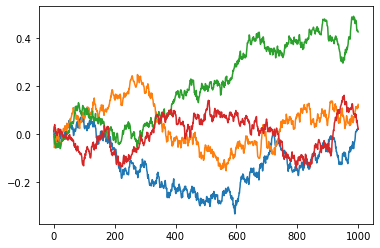

In [33]:
from agent.agent import OUNoise
ounoise = OUNoise(4, 42, sigma=0.1)
agent.reset()
x = [i for i in range(1001)]
noise = [ounoise.sample() for i in x]
plt.plot(x,noise)
plt.show()

Episode 1	Average Score: 0.42	Score: 0.42 	Time: 10.27 	Num iter: 1001
Episode 2	Average Score: 0.57	Score: 0.71 	Time: 9.92 	Num iter: 1001
Episode 3	Average Score: 0.62	Score: 0.72 	Time: 10.53 	Num iter: 1001
Episode 4	Average Score: 0.64	Score: 0.71 	Time: 10.39 	Num iter: 1001
Episode 5	Average Score: 0.67	Score: 0.79 	Time: 10.39 	Num iter: 1001
Episode 6	Average Score: 0.67	Score: 0.66 	Time: 10.30 	Num iter: 1001
Episode 7	Average Score: 0.69	Score: 0.80 	Time: 10.14 	Num iter: 1001
Episode 8	Average Score: 0.69	Score: 0.71 	Time: 9.73 	Num iter: 1001
Episode 9	Average Score: 0.70	Score: 0.80 	Time: 9.95 	Num iter: 1001
Episode 10	Average Score: 0.69	Score: 0.61 	Time: 10.44 	Num iter: 1001
Episode 10	Average Score: 0.69 	Epsilon: 0.98	Time: 10.440628290176392/per episode
Episode 11	Average Score: 0.70	Score: 0.78 	Time: 10.36 	Num iter: 1001
Episode 12	Average Score: 0.72	Score: 0.91 	Time: 10.30 	Num iter: 1001
Episode 13	Average Score: 0.71	Score: 0.62 	Time: 10.06 	Num iter

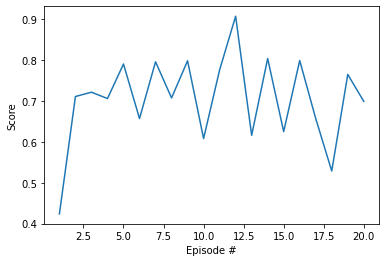

In [12]:
def ddpg(n_episodes=20, max_t=700):  
    scores_deque = deque(maxlen=100)
    scores_avg = [] # initialize the score (for each agent)
    moving_averages = []
    start_time = time.time()
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment  
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        scores = np.zeros(num_agents)
        num_iter = 0
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                       # see if episode finished
#             agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            scores += rewards
            num_iter+=1
            if np.any(dones):
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        scores_avg.append(score)
        moving_averages.append(np.mean(scores_deque))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f} \tTime: {:.2f} \tNum iter: {}'.format(i_episode, np.mean(scores_deque), score, time.time()-start_time, num_iter))
        if i_episode % 10 == 0:
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_{}.pth'.format(i_episode))
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_{}.pth'.format(i_episode))
            print('\rEpisode {}\tAverage Score: {:.2f} \tEpsilon: {:.2f}\tTime: {}/per episode'.format(i_episode, np.mean(scores_deque), agent.epsilon, time.time()-start_time))   
        start_time = time.time()
    return scores_avg, moving_averages

scores, moving_averages = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_list)+1), score_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

In [ ]:
states = env_info.vector_observations

In [ ]:
actions = agent.act(states)
env_info = env.step(actions)[brain_name]           # send all actions to tne environment
next_states = env_info.vector_observations
rewards = env_info.rewards                         # get reward (for each agent)
dones = env_info.local_done                       # see if episode finished
states = next_states

In [ ]:
memory.add(states,actions,rewards, next_states, dones)

In [ ]:
states.shape

In [ ]:
np.array(rewards).reshape(20,1)

In [ ]:
experiences = memory.sample()
states, actions, rewards, next_states, dones = experiences 

In [ ]:
states.shape

In [ ]:
actions.shape

In [ ]:
rewards.shape

In [ ]:
dones.shape

In [ ]:
actions_next = agent.actor_target(next_states)
Q_targets_next = agent.critic_target(next_states, actions_next)
Q_targets = rewards + (0.99 * Q_targets_next * (1 - dones))

In [ ]:
Q_targets_next.shape

In [ ]:
from agent.agent import ReplayBuffer 

In [ ]:
memory = ReplayBuffer(4, 2, 2, 42)

In [ ]:
from agent.agent import OUNoise
noise = [OUNoise(4, 42) for i in range(20)]

In [ ]:
noise = np.array([noise[i].sample() for i, n in enumerate(noise)])

In [ ]:
agent.noise.sample()

In [ ]:
noise

In [ ]:
noise*2